In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as sci #integration toolbox

In [9]:
#equations of motion for flat earth surface
#F= m*a = m*zdd where z = altitute from center of planet along north pole , zd = velocity along z and zdd = acceleration along z
#x is the altitude along equator through Africa
rplanet = 6357000 #radius of earth (m)
mplanet = 5.972e24 #mass of earth (kg)
g = 6.6742*10**-11 #gravitational constant (SI units)
mass = 640/1000 #in kg

#gravitational acceleration model
def gravity(x, z): #this is 2D where z is along north pole and x is along the equator
    global rplanet, mplanet
    r = np.sqrt(x**2 + z**2)
    if r < rplanet:
        accx = 0
        accz = 0
    else:
        accx = g*mplanet/(r**3)*x
        accz = g*mplanet/(r**3)*z
    return np.asarray([accx, accz])

#second order differential equation 
def Derivatives(state, t):
    global mass
    x = state[0] #1st row of state vector
    z = state[1] #2nd row of state vector
    velx = state[2]
    velz = state[3]

    #kinematics equations
    zd = velz #derivative of position is velocity
    xd = velx
    #computing total forces
    gravf = -gravity(x, z)*mass #this is newtonian gravity and z needs to be in reference with the center of planet 
    aerof = np.asarray([0, 0]) #aerodynamics
    thrustf = np.asarray([0, 0])
    Forces = gravf + aerof + thrustf
    dd = Forces/mass
    #compute stated
    stated = np.asarray([xd,zd, dd[0], dd[1]]) #[derivative of velx, derivative of velz, array of dd]

    return stated

In [26]:
#testing surface gravity
print("Surface gravity (m/s^2) = ", gravity(0, rplanet))

#intial conditions
x0 = rplanet + 600000 #with reference to center of earth #in meters and 600000 meters is because the spacecraft is beyond the radius of planet
z0 = 0
r0 = np.sqrt(x0**2 + z0**2)
velz0 = np.sqrt(g*mplanet/r0)*1.1 #in m/s
velx0 = 0
stateinitial = np.asarray([x0, velx0, z0, velz0])
#time window
period = 2*np.pi/np.sqrt(g*mplanet)*r0**(3/2)*1.5 #kepler equation to tell how long orbit takes
tout = np.linspace(0, period, 1000) #(intial time, final time, no. of data points) #

#Numerical integration call
stateout = sci.odeint(Derivatives, stateinitial, tout) #odeint is ordinary differential equation toolbox, stateintial is intial conditions
xout = stateout[:,0]
zout = stateout[:,1]
altitude = np.sqrt(xout**2 + zout**3) - rplanet #since we are taking the altitude till spacecraft 
velxout = stateout[:,2]
velzout = stateout[:,3]
velout = np.sqrt(velxout**2 + velzout**2)

Surface gravity (m/s^2) =  [0.         9.86312626]


C:\Users\DELL\AppData\Local\Temp\ipykernel_10880\1217557755.py:19: RuntimeWarning: invalid value encountered in sqrt
  altitude = np.sqrt(xout**2 + zout**3) - rplanet #since we are taking the altitude till spacecraft


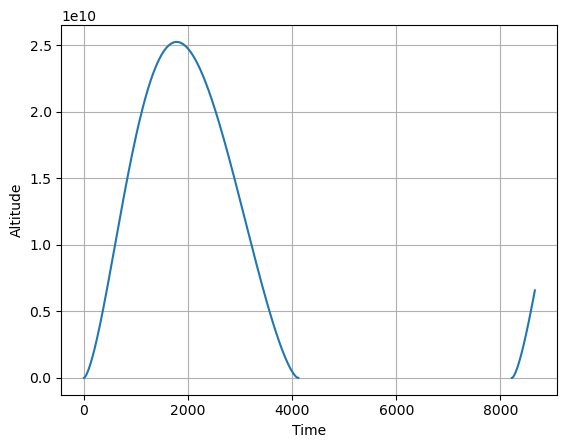

In [27]:
#plot for altitude
plt.plot(tout, altitude)
plt.xlabel("Time")
plt.ylabel("Altitude")
plt.grid()

<Figure size 640x480 with 0 Axes>

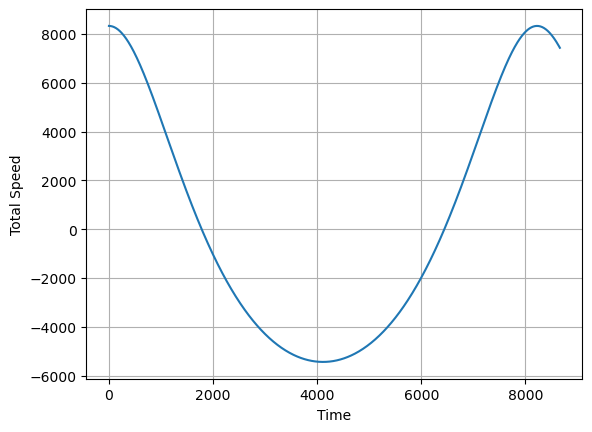

<Figure size 640x480 with 0 Axes>

In [28]:
#plot for velocity
plt.plot(tout, velzout)
plt.xlabel("Time")
plt.ylabel("Total Speed")
plt.grid()
plt.figure()

#both figures give projectile flat earth model

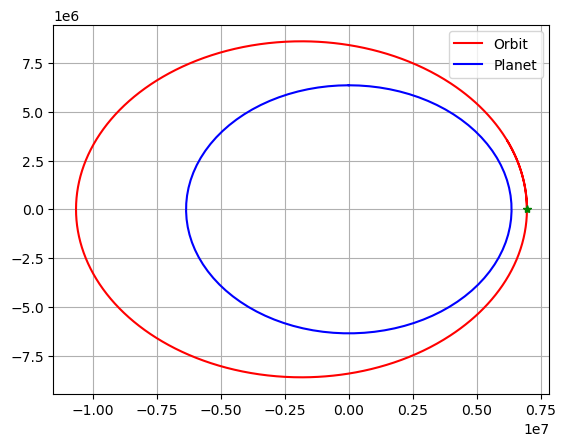

In [29]:
#2D orbit
plt.figure()
plt.plot(xout,zout, "r-", label = "Orbit")
plt.plot(xout[0], zout[0],"g*")
theta = np.linspace(0,2*np.pi, 100)
xplanet = rplanet*np.sin(theta) #these are parametic equations of a circle
yplanet = rplanet*np.cos(theta)
plt.plot(xplanet, yplanet, "b-", label = "Planet")
plt.grid()
plt.legend()

#this is kepler's second law where the the motion is faster when the object is close to planet forming an elliptical orbit